In [1]:
from IPython.display import Image

## Example: Heat transfer

You may have in a previous course solved the heat equation. Let's see what headway we can make on this problem using dimensional analysis

At time $t = 0$, heat energy $e$ concentrated at a point in space diffuses outward into a region with temperature 0. Let $r$ be the radial distance from the source, and let $t$ be time. We want to find the temperature $u$ as a function of $r$ and $t$. Like our previous example, we first need to figure out which quantities we expect to appear in our formula
* $t$, $r$, $e$
* heat capacity $c$ (energy per degree per unit volume)
* thermal diffusivity $k$ (length-squared per time)
So we hypothesise a physical law of the form $f(t, r, u, e, k, c) = 0$.

As in our previous example, the next step is to find a minimal set of dimensionless quantities. So, let's do this. We don't always have to go down to the fundamental quantities, we can instead use secondary ones if we want to, for convenience. We will use $[T], [L], [\Theta], [E]$:

\begin{align}
    [t] &= [T], & [r] &= [L], & [u] &= [\Theta], \\
    [e] &= [E], & [k] &= [L]^2[T]^{-1}, & [c] &= [E][\Theta]^{-1}[L]^{-3}
\end{align}

So we look at $\pi = t^{x_1} r^{x_2} u^{x_3} e^{x_4} k^{x_5} c^{x_6}$, and find the dimension matrix $A$ to be (with rows corresponding to $[T], [L], [\Theta], [E]$

\begin{equation*}
    \begin{bmatrix}
        1 & 0 & 0 & 0 & -1 &  0 \\
        0 & 1 & 0 & 0 &  2 & -3 \\
        0 & 0 & 1 & 0 &  0 & -1 \\
        0 & 0 & 0 & 1 &  0 &  1
    \end{bmatrix}
\end{equation*}
which is conveniently in RREF, thanks to our choice of dimensions. If we'd had mass instead of energy it would have been messier, but still worked. So following the method above, we have two dimensionless quantities
\begin{align}
    \pi_1^* &= \frac{tk}{r^2} & \pi_2^* &= \frac{ucr^3}{e}
\end{align}
At this point it's sometimes worthwhile manipulating these a little to get ones you like better. I'm going to take the reciprocal of $\pi_1$ and square root it.
\begin{equation}
    \pi_1 = \frac{r}{\sqrt{kt}}
\end{equation}
I'd also like to lose the dependence on $r$ from $\pi_2^*$, so I'll form a new constant by forming $\displaystyle \pi_2 =  \frac{\pi_2^*}{\pi_1^3} = \frac{uc}{e} (kt)^{\frac{3}{2}}$. Our posited physical law should then by the Pi Theorem be equivalent to a physical law of the form
\begin{equation}
    F(\pi_1, \pi_2) = 0
\end{equation}
We can solve this for $\pi_2$ to give
\begin{equation}
    \pi_2 = g(\pi_1)
\end{equation}
for some function $g$. Substituting everything in
\begin{equation}
    u = \frac{e}{c}(kt)^{-\frac{3}{2}} g\left(\frac{r}{\sqrt{kt}}\right)
\end{equation}
This is a fairly impressively specific form that we've derived just from intuition about the quantities involved. If you solve the heat equation IVP, this is the kind of solution that you see. So for example, near the origin, temperature falls off like $t^{-3/2}$.
    
        

# Scaling
Another procedure that is important for understanding the behaviour of
mathematical models, and simplifying them, is that of scaling. It is
essential when attempting to understand which terms in an equation (e.g. a
differential equation) are negligible compared with others. Scaling also
tends to reduce the number of parameters in a problem, leading to
simplification.

Consider the problem of the propagation of an electrical signal along the
walls of an artery. On the one hand, the signal is transmitted from cell to
cell, by pumping ions in and out of cells, a process that occurs on the
micrometer scale. But on the other, the propagation is slow and observable
on the scale of centimetres. This problem has multiple scales, and we want
our spatial variable to capture the phenomenon we are interested in. We
tend to want our variables to be of \emph{order unity}, this means that
they are not really small or large, so we choose a \emph{characteristic
scale} and construct a new dimensionless variable. For example, to study
the spatial dynamics within a handful of cells, we might choose a
characteristic scale $x_c$ of a few hundred microns, and rescale $x$ (in m)
to a new dimensionless variable $\bar{x}$
\begin{equation}
  \bar{x} = \frac{x}{x_c}
\end{equation}
We do this for all of the variables (e.g. $t$, etc.). This process is
called *non-dimensionalisation*. This is easiest to understand with
reference to an example:

## Population growth
Let $p = p(t)$ be the population of some animal species in a fixed region over time. The simplest model of population growth comes from the assumption that each individual has a fixed probability of reproducing in any given time step. We assume that our $p$ is well approximated by a continuous variable, and our assumption leads to a fixed growth rate $r > 0$ and corresponding governing differential equation
\begin{equation}
  \frac{dp}{dt} = rp
\end{equation}
This equation (the *Malthus model*) has the solution $p(t) = p_0e^{rt}$, and is clearly unrealistic, as eventually constraints on habitat and resources will cause the growth to slow. The simplest modification to the model assumes that interractions with other individuals is a good proxy for competition for resources, and that the number of interactions is proportional to $p^2$ (under some assumptions). So we subtract a term proportional to $p^2$:
\begin{equation}
  \frac{dp}{dt} = rp\left(1 - \frac{p}{K}\right), \quad p(0) = p_0
\end{equation}
$K$ is the \emph{carrying capacity}, $\frac{dp}{dt} = 0$ when $p = k$, and exceeding $K$ will cause a negative growth rate.

The right hand side function is displayed below:

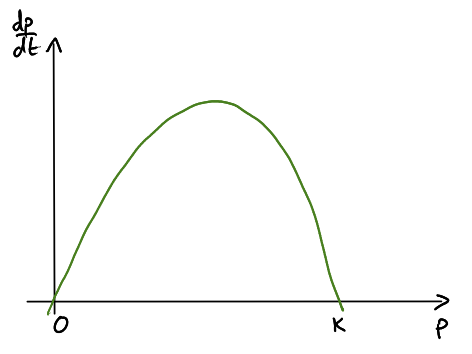

In [2]:
Image(filename='logistic.png') 

So, how do we choose a characteristic scale for time and population? Well, we form these from the constants in the problem, $r$, $K$, and $p_0$. Only $r$ contains the dimension of time, so we rescale time to form the dimensionless time $\tau$:
\begin{equation*}
  \tau = rt.
\end{equation*}
Our other constants in the problem, $p_0$ and $K$ have dimensions of population number, so either can be chosen to rescale the population. We'll choose $K$ and define our new dimensionless population $P$ as
\begin{equation*}
  P = \frac{p}{K}
\end{equation*}
Substituting in, we get
\begin{align*}
  (Kr)\frac{dP}{d\tau} &= rKP(1 - P) \\
  \frac{dP}{d\tau} &= P(1 - P), \quad P(0) = \alpha
\end{align*}
where $\alpha = \frac{p_0}{K}$.  Note how our rescaled problem has only one parameter $\alpha$, all of the other parameters have disappeared from the problem, if we solve this problem for $P$ and $\tau$, we can get our original solution by reversing the scaling. This problem can be solved (separation of variables) to give 
\begin{equation*}
  P(\tau) = \frac{\alpha}{\alpha + (1 - \alpha)e^{-\tau}}
\end{equation*}
and $\lim_{\tau \to \infty} P(\tau) = 1$, *i.e.* $p \to K$ as $t \to \infty$.